In [25]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import statistics
import math
import matplotlib.image as image
from PIL import Image
import matplotlib.animation

%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_image(directory, file):
    csv_url=r'C:\Users\Israel Gitler\Desktop\Drawings-project\train\train\{dir}\SimpleTest\{file}.csv'.format(dir=directory, file=file)
    df = pd.read_csv(csv_url, sep=',')
    png_url=r'C:\Users\Israel Gitler\Desktop\Drawings-project\train\train\{dir}\SimpleTest\{file}.png'.format(dir=directory, file=file)
    img=image.imread(png_url)
    return df, img, png_url

df, img, png_url = load_image(7554, 5)

## let's look at the png image of the drawing

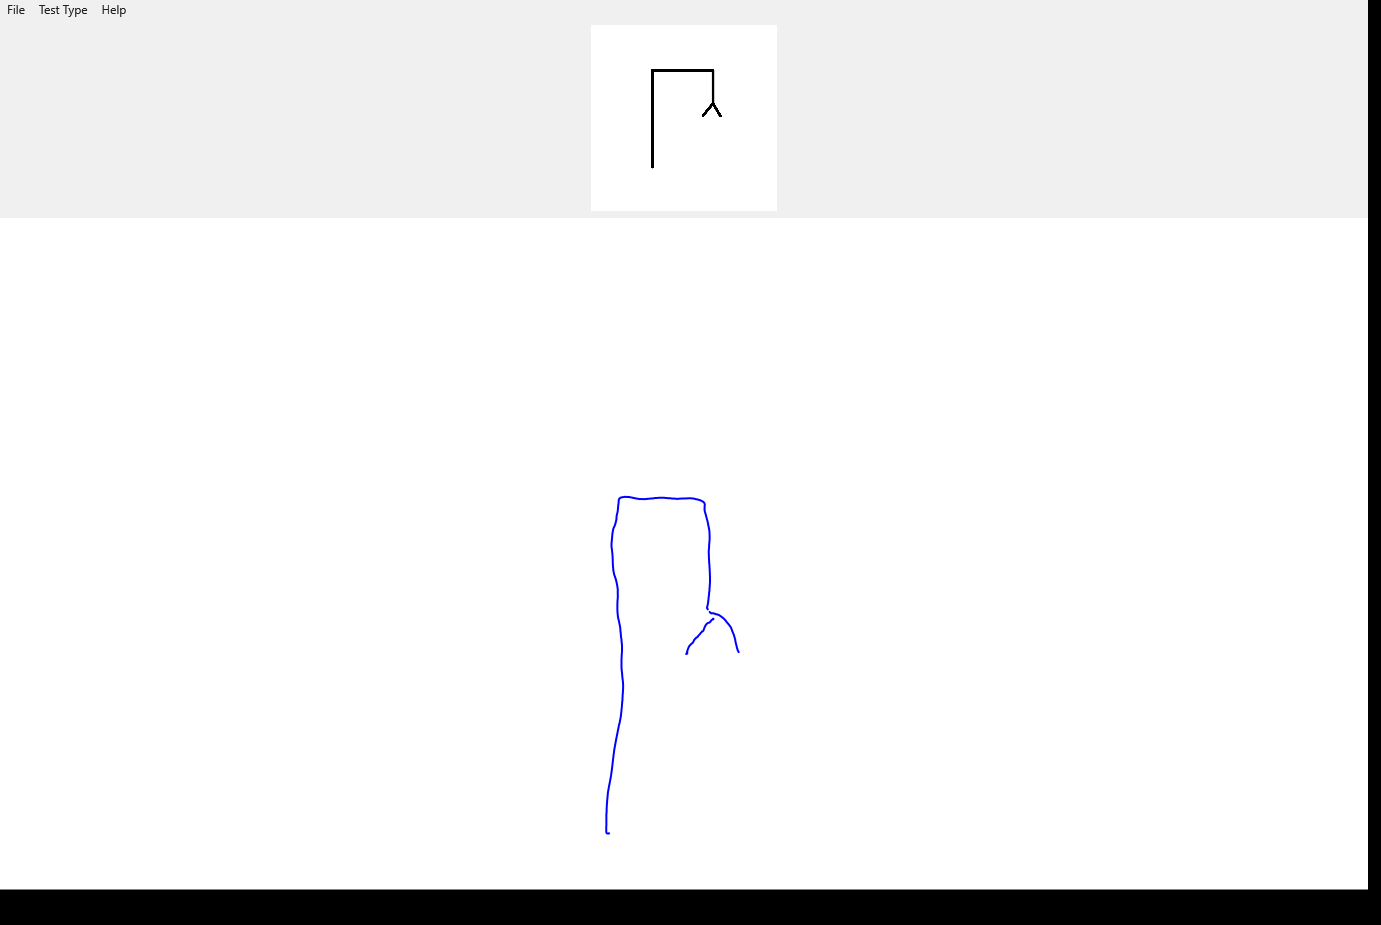

In [3]:
image=Image.open(png_url)
image

## Let's look at a simulation of the drawing! 

<IPython.core.display.Javascript object>


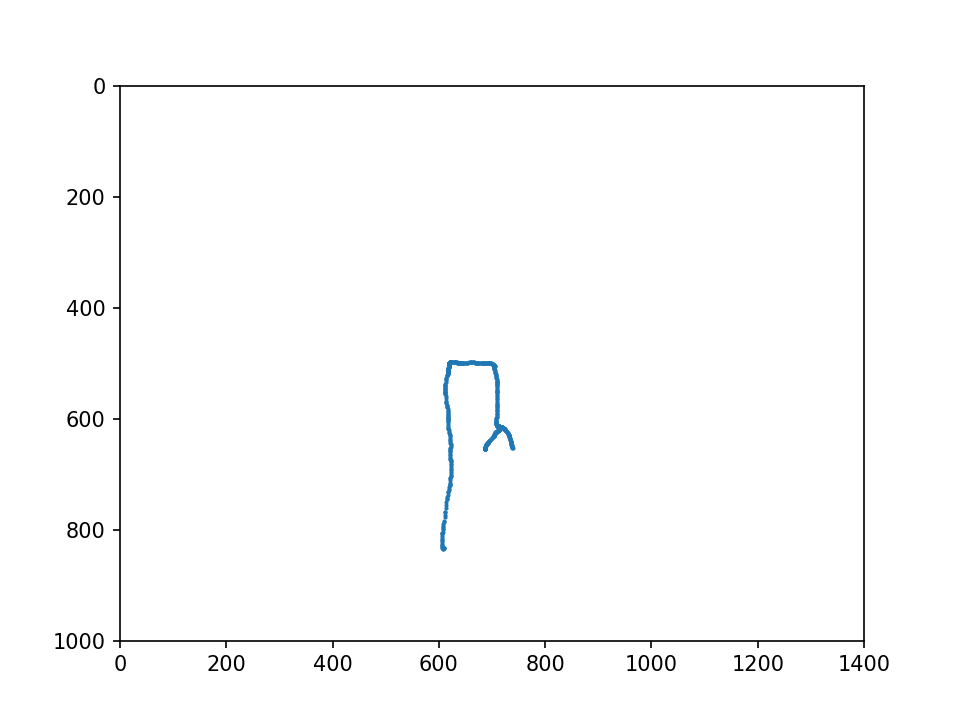

In [4]:


fig, ax = plt.subplots()
x, y = [],[]
sc = ax.scatter(x,y, s=1)
plt.xlim(0,1400)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

def animate(i):
    x.append(df['X'][i])
    y.append(df[' Y'][i])
    sc.set_offsets(np.c_[x,y])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                interval=10) 
plt.show()

In [7]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749
3,609.03568541402,833.323017,0.107652,-3959.0,-670.0,00:02.7741475
4,608.719713592794,833.586326,0.129381,-4059.0,-694.0,00:02.7898665
...,...,...,...,...,...,...
498,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4421005
499,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4578282
500,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4733589
501,686.132809793279,654.061670,0.490227,-3717.0,1573.0,00:16.4891290


## We can see that the last 2 lines are a summary and are not really needed

In [8]:
time_summary = df.iloc[-2:]
df = df.iloc[:-2]
df

,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749
3,609.03568541402,833.323017,0.107652,-3959.0,-670.0,00:02.7741475
4,608.719713592794,833.586326,0.129381,-4059.0,-694.0,00:02.7898665
...,...,...,...,...,...,...
496,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4108817
497,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4264769
498,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4421005
499,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4578282


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          501 non-null    object 
 1    Y         501 non-null    float64
 2    Pressure  501 non-null    float64
 3    TiltX     501 non-null    float64
 4    TiltY     501 non-null    float64
 5    Time      501 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.6+ KB


## We can see that the X column is an object and not float, so we'll change that

In [10]:
df['X'] = df['X'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          501 non-null    float64
 1    Y         501 non-null    float64
 2    Pressure  501 non-null    float64
 3    TiltX     501 non-null    float64
 4    TiltY     501 non-null    float64
 5    Time      501 non-null    object 
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


# Datetime/float

We saw that although datetime has a lot of options to work with' we preffered to change the time to float.. 
and we didn't want to add columns that we will not use..

In [11]:
df['Time_sec'] = df[' Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec
0,608.351080,833.323017,0.107164,-3848.0,-644.0,00:02.7272871,2.727287
1,608.877700,833.165031,0.107164,-3848.0,-644.0,00:02.7429109,2.742911
2,608.877700,833.165031,0.099107,-3848.0,-644.0,00:02.7585749,2.758575
3,609.035685,833.323017,0.107652,-3959.0,-670.0,00:02.7741475,2.774148
4,608.719714,833.586326,0.129381,-4059.0,-694.0,00:02.7898665,2.789867
...,...,...,...,...,...,...,...
496,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4108817,16.410882
497,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4264769,16.426477
498,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4421005,16.442100
499,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4578282,16.457828


## we added a column of the change in the time between each line and the previous one

In [12]:
df['Shift']=df['Time_sec'].shift(periods=1)
df['Time_change']=df['Time_sec'].sub(df['Shift'])
df=df.drop('Shift', axis=1)
df['Time_change'][0]=0
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change
0,608.351080,833.323017,0.107164,-3848.0,-644.0,00:02.7272871,2.727287,0.000000
1,608.877700,833.165031,0.107164,-3848.0,-644.0,00:02.7429109,2.742911,0.015624
2,608.877700,833.165031,0.099107,-3848.0,-644.0,00:02.7585749,2.758575,0.015664
3,609.035685,833.323017,0.107652,-3959.0,-670.0,00:02.7741475,2.774148,0.015573
4,608.719714,833.586326,0.129381,-4059.0,-694.0,00:02.7898665,2.789867,0.015719
...,...,...,...,...,...,...,...,...
496,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4108817,16.410882,0.000000
497,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4264769,16.426477,0.015595
498,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4421005,16.442100,0.015624
499,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4578282,16.457828,0.015728


## We added a column of the distance between a point and the previous one

In [13]:
distance=[None]
distance.extend([math.sqrt(math.pow((df.iloc[i]['X']-df.iloc[i-1]['X']),2)+math.pow((df.iloc[i][' Y']-df.iloc[i-1][' Y']),2)) for i in range(1,len(df))])
df['Distance']= distance
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change,Distance
0,608.351080,833.323017,0.107164,-3848.0,-644.0,00:02.7272871,2.727287,0.000000,NaN
1,608.877700,833.165031,0.107164,-3848.0,-644.0,00:02.7429109,2.742911,0.015624,0.549807
2,608.877700,833.165031,0.099107,-3848.0,-644.0,00:02.7585749,2.758575,0.015664,0.000000
3,609.035685,833.323017,0.107652,-3959.0,-670.0,00:02.7741475,2.774148,0.015573,0.223426
4,608.719714,833.586326,0.129381,-4059.0,-694.0,00:02.7898665,2.789867,0.015719,0.411303
...,...,...,...,...,...,...,...,...,...
496,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4108817,16.410882,0.000000,0.000000
497,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4264769,16.426477,0.015595,0.000000
498,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4421005,16.442100,0.015624,0.000000
499,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4578282,16.457828,0.015728,0.000000


In [14]:
df.Distance[0]=0
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change,Distance
0,608.351080,833.323017,0.107164,-3848.0,-644.0,00:02.7272871,2.727287,0.000000,0.000000
1,608.877700,833.165031,0.107164,-3848.0,-644.0,00:02.7429109,2.742911,0.015624,0.549807
2,608.877700,833.165031,0.099107,-3848.0,-644.0,00:02.7585749,2.758575,0.015664,0.000000
3,609.035685,833.323017,0.107652,-3959.0,-670.0,00:02.7741475,2.774148,0.015573,0.223426
4,608.719714,833.586326,0.129381,-4059.0,-694.0,00:02.7898665,2.789867,0.015719,0.411303
...,...,...,...,...,...,...,...,...,...
496,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4108817,16.410882,0.000000,0.000000
497,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4264769,16.426477,0.015595,0.000000
498,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4421005,16.442100,0.015624,0.000000
499,686.132810,654.061670,0.507561,-3717.0,1573.0,00:16.4578282,16.457828,0.015728,0.000000


## now after we finished organizing the data, we can start with the functions to calculate what we need:

## Length and mean pressure of the lines

In [15]:
#A function that calculates the length and mean pressure of each line in the drawing
def len_and_mean_pressure(lines):
    mean_pressures=[]
    lengths=[]
    for line in lines:
        pressure_sum=0
        line_length=0
        for dot in line:
            pressure_sum+=df[' Pressure'][dot]
            line_length+=df.Distance[dot]
        mean_pressure=pressure_sum/len(line)
        mean_pressures.append(mean_pressure)
        lengths.append(line_length)
        print('Line number ' +str(lines.index(line)+1)+ ' mean pressure is: ' +str(mean_pressure)+ ' and the length of it is: ' +str(line_length))


## The number of lifts

In [16]:
#A function that calculates the number of lifts in the drawing according to the time change and the distance
def lifts(df):
    lifts_sum=0
    for i in range(len(df)):
        if df.Distance[i] >= 20 and df.Time_change[i] >= 0.5:
            lifts_sum +=1
    return lifts_sum

## The number of lines

Before we get to the code of calculating the number of lines we wanted to say that there are a few ways to decide how many lines there are in the drawing. what we decided on is that any line that its' slope chages drasticly is a differet line. we know that according to it a circle isn't a 1 line as needed but a several- but like you taught us- in real life there are no perfect solutions..

The way we calculate is this: we take the first point and calculate the slope of the beginning of the drawing, then we calculate 2 perallel lines with 50 pixels from our line and they create the range- any small change between the range is still considered the same line. when the shape goes out of the range (because the slope changed drastically) then it is considered a different line and we start the process all over again from that point..  

In [17]:
#A function that calculates the slope to the line that starts with 'index'-
#according to the mean slope of the slops of the next 5 points
def find_slope(index):
    slopes=[]
    for i in range (1,6):
        if (df['X'][i]-df['X'][i+1])<0.0001 and (df['X'][i]-df['X'][i+1])> -0.0001:
            continue
        else:
            slope=(df[' Y'][i]-df[' Y'][i+1]) / (df['X'][i]-df['X'][i+1])
            slopes.append(slope)
    if len(slopes)==0:
        return math.inf
    return statistics.mean(slopes)

#A function that calculates the intercept-b, in the line form- y=mx+b
def find_b(i, m):
    b=df[' Y'][i]-(-1/m)*df['X'][i]
    return b

#A function that calculates the 2 intercepts-b of the lines that define the range of our line (the m is the same)
def find_vectors(i, m):    
    #If slope is 0
    if (m == 0):
        x1 = df['X'][i] + 50
        y1 = df[' Y'][i]
 
        x2 = df['X'][i] - 50
        y2 = df[' Y'][i]
 
    #If slope is infinite
    elif m== math.inf:
        x1 = df['X'][i]
        y1 = df[' Y'][i] + 50
 
        x2 = df['X'][i]
        y2 = df[' Y'][i] - 50
    
    else:
        dx = 50 / math.sqrt(1 + (m * m))
        dy = m * dx
        x1 = df['X'][i] + dx
        y1 = df[' Y'][i] + dy
        x2 = df['X'][i] - dx
        y2 = df[' Y'][i] - dy
        b1 = y1 - m*x1
        b2 = y2 - m*x2
    return b1, b2

#A function that calculates the distance between 2 points
def dis(x1, y1, x2, y2):
    d = math.sqrt(math.pow((x1-x2), 2) + math.pow((y1-y2), 2))
    return d

#A function that calculates the distances between the current point and the closest points in the range lines 
def find_dis(curr_i, m, b1, b2):
    curr_m = -1/m
    curr_b= df[' Y'][curr_i] - curr_m*df['X'][curr_i]
    curr_x1 = (curr_b-b1) / (m-curr_m)
    curr_y1= curr_m*curr_x1+curr_b
    
    curr_x2 = (curr_b-b2) / (m-curr_m)
    curr_y2= curr_m*curr_x2+curr_b
    
    dis1 =dis(df['X'][curr_i], df[' Y'][curr_i], curr_x1, curr_y1)
    dis2 =dis(df['X'][curr_i], df[' Y'][curr_i], curr_x2, curr_y2)
    
    return dis1, dis2
    
#A function that returns an arrays that contains the indexes of each line
def lines_indexes(df):
    lines=[]
    first_i=0
    m = find_slope(0)
    b = find_b(0, m)
    b1, b2 = find_vectors(0, m)
    i=1
    #because we calculate the slope-m with the next 5 points we stop at len(df)-6
    while i<len(df)-6:
        dis1, dis2 = find_dis(i, m, b1, b2)
        if dis1<100 and dis2<100:
            i+=1
        else:
            line= range(first_i,i)
            first_i=i
            lines.append(line)
            i+=1
            m = find_slope(i)
            b = find_b(i, m)
            b1, b2 = find_vectors(i, m)
    line= range(first_i,len(df))
    lines.append(line)        
    return lines
            
##A function that returns the number of lines in the drawing        
def count_lines(df):
    return len(lines_indexes(df)) 

## Is the shape open or closed?

In [18]:
#A function that cuts the top part of the png image (not part of the drawing)
def cut_image(img):
    for i in range(img.shape[0]):
        if(img[i][0][0]==1 and img[i][0][1]==1 and img[i][0][2]==1):
            new_img=img[i:]
            return new_img

#A function that calculate if the drawing is closed or open- 
# with the help of a copy of the image that it colors the outside of the drawing but not the inside(if it's closed)
def closed_or_open_shape(img):
    new_img=cut_image(img)
    # converting to black-white mat
    my_arr= []
    white_row=[]
    #we're adding a frame of white so if a line crosses from one side to the other it won't be a problem
    for i in range(new_img.shape[1]+2):
        white_row.append(1)
    my_arr.append(white_row)
    for i in range(new_img.shape[0]):
        new_row=[]
        new_row.append(1)
        for j in range(new_img.shape[1]):
            if(new_img[i][j][0]==1 and new_img[i][j][1]==1 and new_img[i][j][2]==1):
                new_row.append(1)
            else:
                new_row.append(0)
        new_row.append(1)
        my_arr.append(new_row)
    my_arr.append(white_row)
    my_arr=np.array(my_arr)

    # we are looking at each square- only if it's white: 
    # we color it and add all the squares around it (max 8) to the indexes that way, 
    # we will never reach the white squares that are inside a black shape
    indexes= {(0,0)}

    copy=my_arr.copy()

    while len(indexes)!=0:
        curr = indexes.pop()
        i=curr[0]
        j=curr[1]
        if copy[i][j] == 1:
            copy[i][j] = 2
            if i-1>=0:
                indexes.add((i-1,j))
                if j-1>=0:
                    indexes.add((i-1,j-1))
                if j+1<len(copy[0]):
                    indexes.add((i-1,j+1))
            if i+1 < len(copy):
                indexes.add((i+1,j))
                if j-1>=0:
                    indexes.add((i+1,j-1))
                if j+1<len(copy[0]):
                    indexes.add((i+1,j+1))
            if j-1>=0:
                indexes.add((i,j-1))   
            if j+1<len(copy[0]):
                    indexes.add((i,j+1))
    #now we will look if there are any white squares in the copy image- 
    #if so- it's a closed shape, and if not- it's an open shape
    flag=False
    for i in range(len(copy)):
        for j in range(len(copy[0])):
            if copy[i][j]==1:
                flag=True
                break
    if flag:        
        print("The shape is CLOSED")
    else:
        print("The shape is NOT CLOSED")
    #just for fun we'll show the colored image:)
    copy.shape
    plt.matshow(copy)
    plt.title("The image after we colored all the white pixels around the shapes\n")
    
    plt.colorbar()
    plt.show()

# Now we will answer the needed questions:

### How many lines are there in the drawing?

In [19]:
print("Number of lines : " + str(count_lines(df)))

Number of lines : 5


### what are the lengths and mean pressure of each line in the drawing?  

In [20]:
len_and_mean_pressure(lines_indexes(df))

Line number 1 mean pressure is: 0.43712519686669105 and the length of it is: 99.72305959884599
Line number 2 mean pressure is: 0.5847802176361993 and the length of it is: 105.92007282906532
Line number 3 mean pressure is: 0.6126112854480743 and the length of it is: 103.27909902357837
Line number 4 mean pressure is: 0.5316837687434546 and the length of it is: 264.9117005875524
Line number 5 mean pressure is: 0.40198171094502555 and the length of it is: 107.90477027661815


### How many lifts did the kid do while drawing?

In [21]:
print("Number of lifts : " + str(lifts(df)))

Number of lifts : 1


### Is the shape closed or open?

The shape is NOT CLOSED


<IPython.core.display.Javascript object>


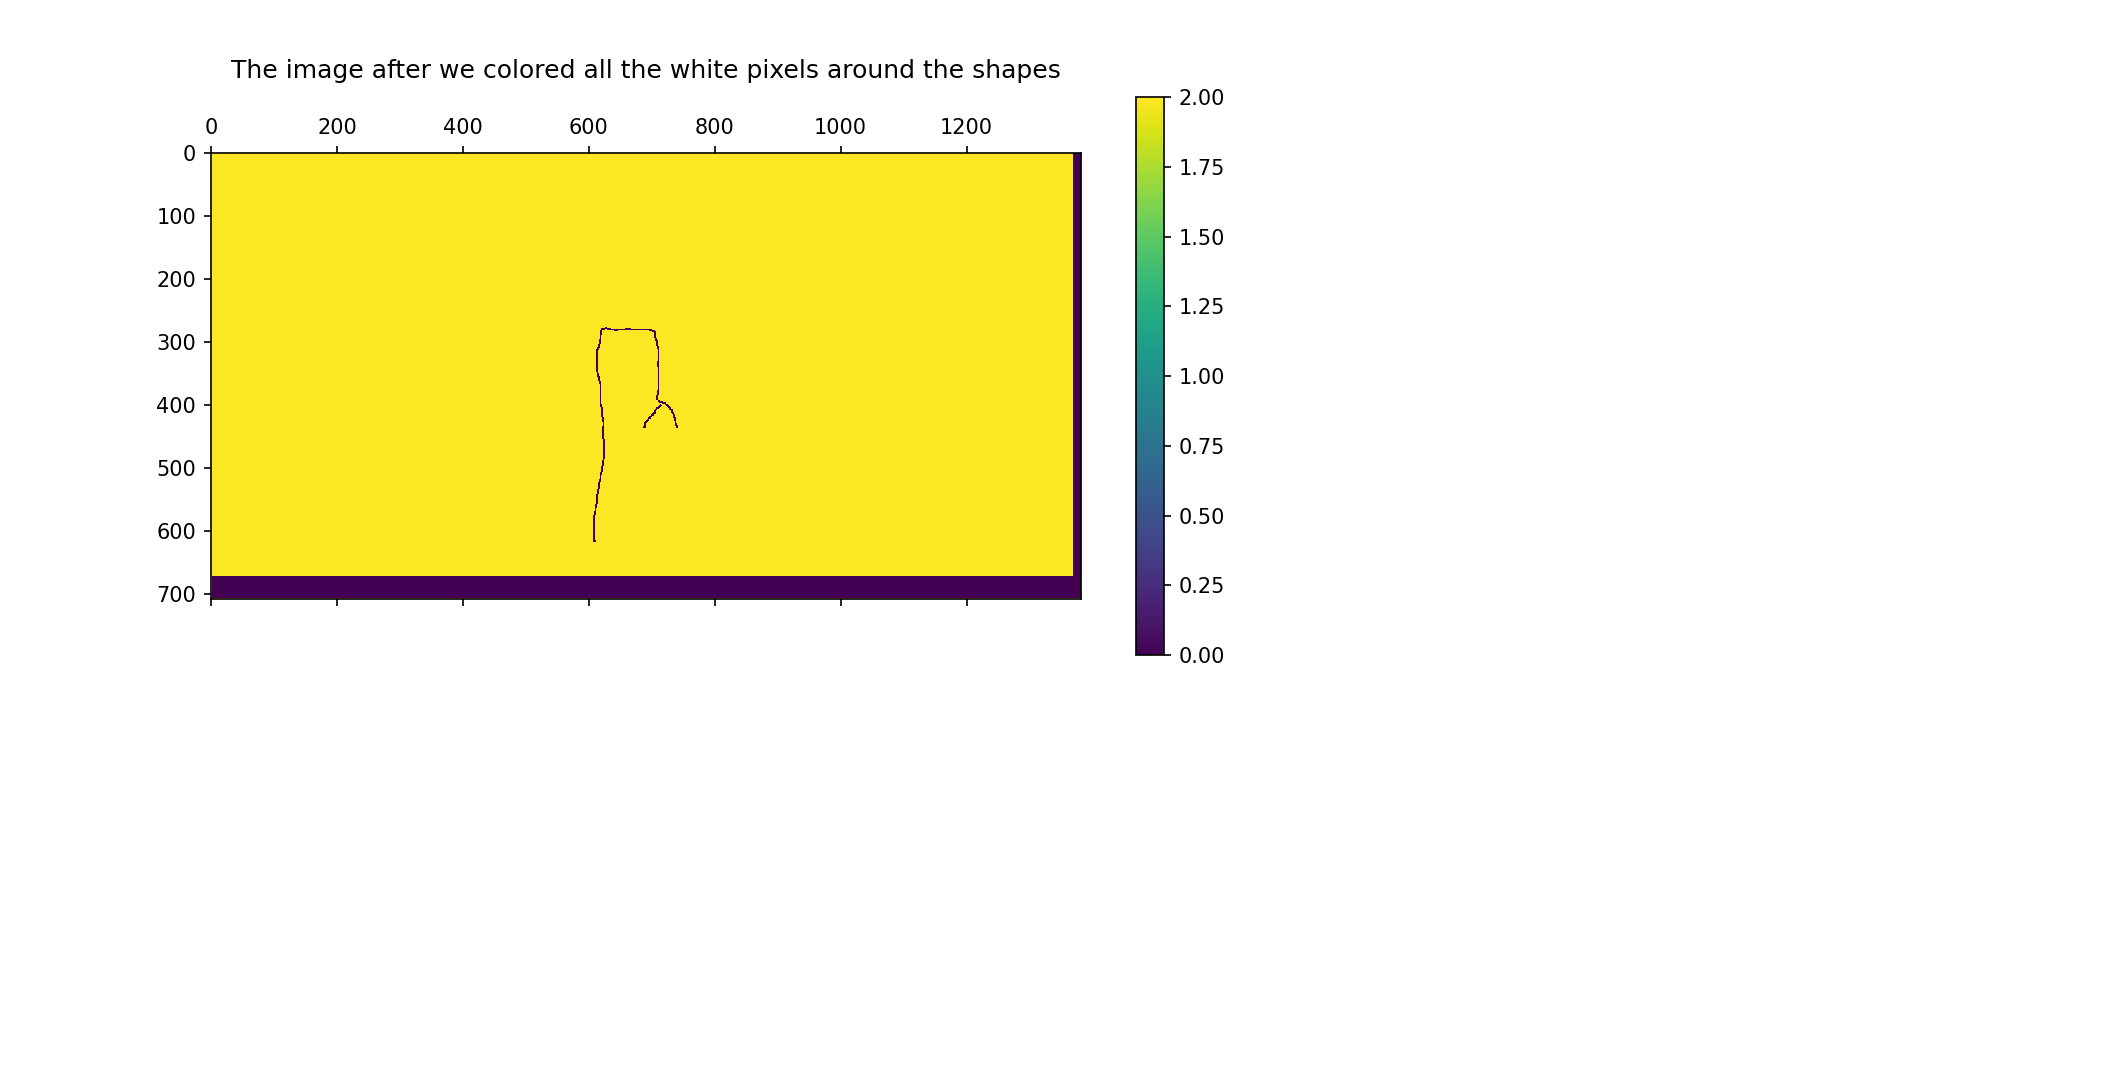

In [22]:
closed_or_open_shape(img)

# Let's check our algorithm on a few other drawings:
## Before we do that, let's combine all the preprocessing into one function

In [23]:
def preprocessing(df):
    df = df.iloc[:-2]
    df['X'] = df['X'].astype('float64')
    df['Time_sec'] = df[' Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))
    df['Shift']=df['Time_sec'].shift(periods=1)
    df['Time_change']=df['Time_sec'].sub(df['Shift'])
    df=df.drop('Shift', axis=1)
    df['Time_change'][0]=0
    distance=[None]
    distance.extend([math.sqrt(math.pow((df.iloc[i]['X']-df.iloc[i-1]['X']),2)+math.pow((df.iloc[i][' Y']-df.iloc[i-1][' Y']),2)) for i in range(1,len(df))])
    df['Distance']= distance
    df.Distance[0]=0
    return df

Directory number: 7554, Drawing number: 4

Number of lines : 3

Line number 1 mean pressure is: 0.6109058434210185 and the length of it is: 384.8093896672419
Line number 2 mean pressure is: 0.7603643799757028 and the length of it is: 249.24161569078578
Line number 3 mean pressure is: 0.7153591917407129 and the length of it is: 19.991280921890105


Number of lifts : 0

The shape is CLOSED


<IPython.core.display.Javascript object>


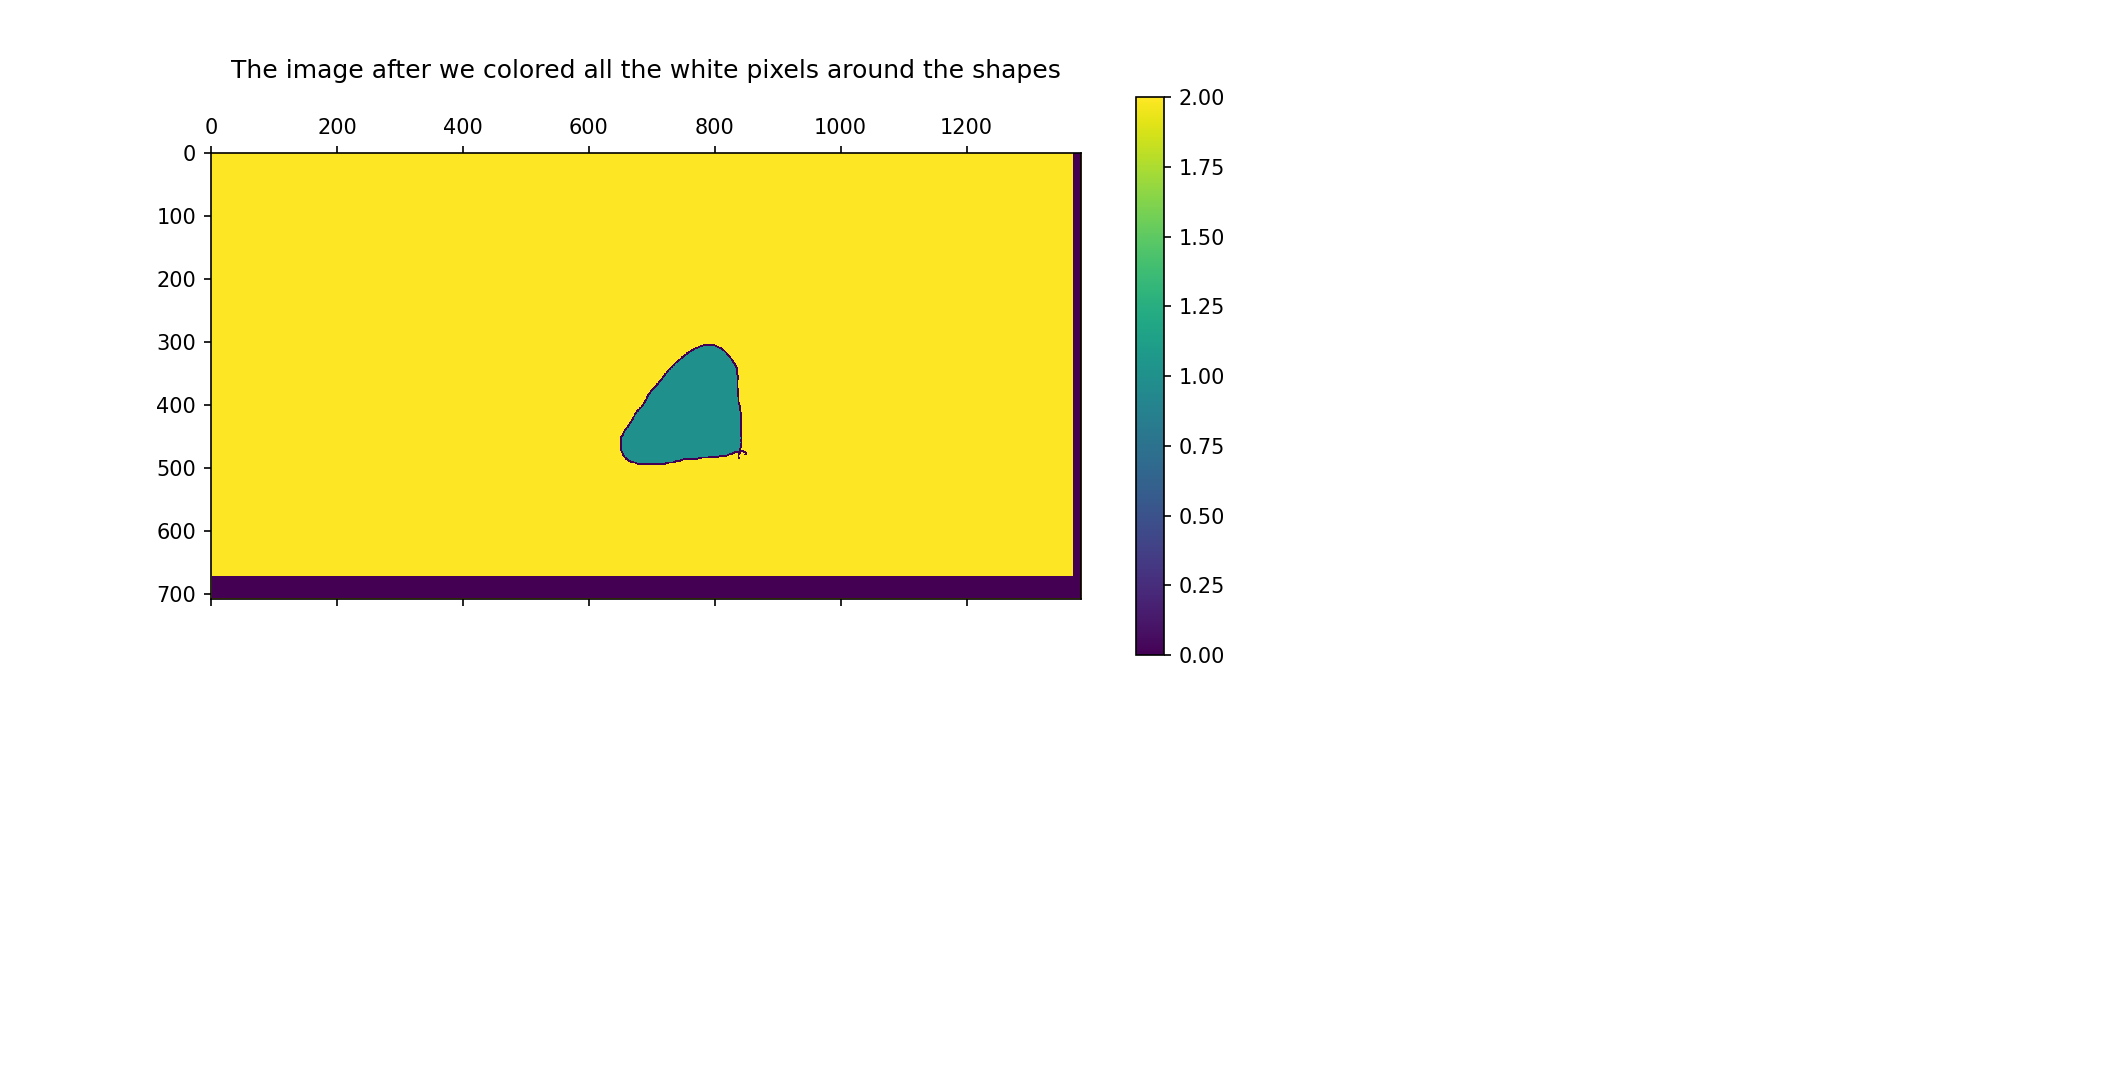




Directory number: 7554, Drawing number: 8

Number of lines : 8

Line number 1 mean pressure is: 0.35806872961164893 and the length of it is: 113.98918962000461
Line number 2 mean pressure is: 0.6123867518193012 and the length of it is: 112.81958042179231
Line number 3 mean pressure is: 0.657490270677954 and the length of it is: 148.09768411651538
Line number 4 mean pressure is: 0.748076900581404 and the length of it is: 355.98747996075184
Line number 5 mean pressure is: 0.7931961789727211 and the length of it is: 112.72781610059361
Line number 6 mean pressure is: 0.6249582109319188 and the length of it is: 858.4998199450303
Line number 7 mean pressure is: 0.6965464025400998 and the length of it is: 263.21224662935174
Line number 8 mean pressure is: 0.7294614260846917 and the length of it is: 97.73476622945518


Number of lifts : 2

The shape is CLOSED


<IPython.core.display.Javascript object>


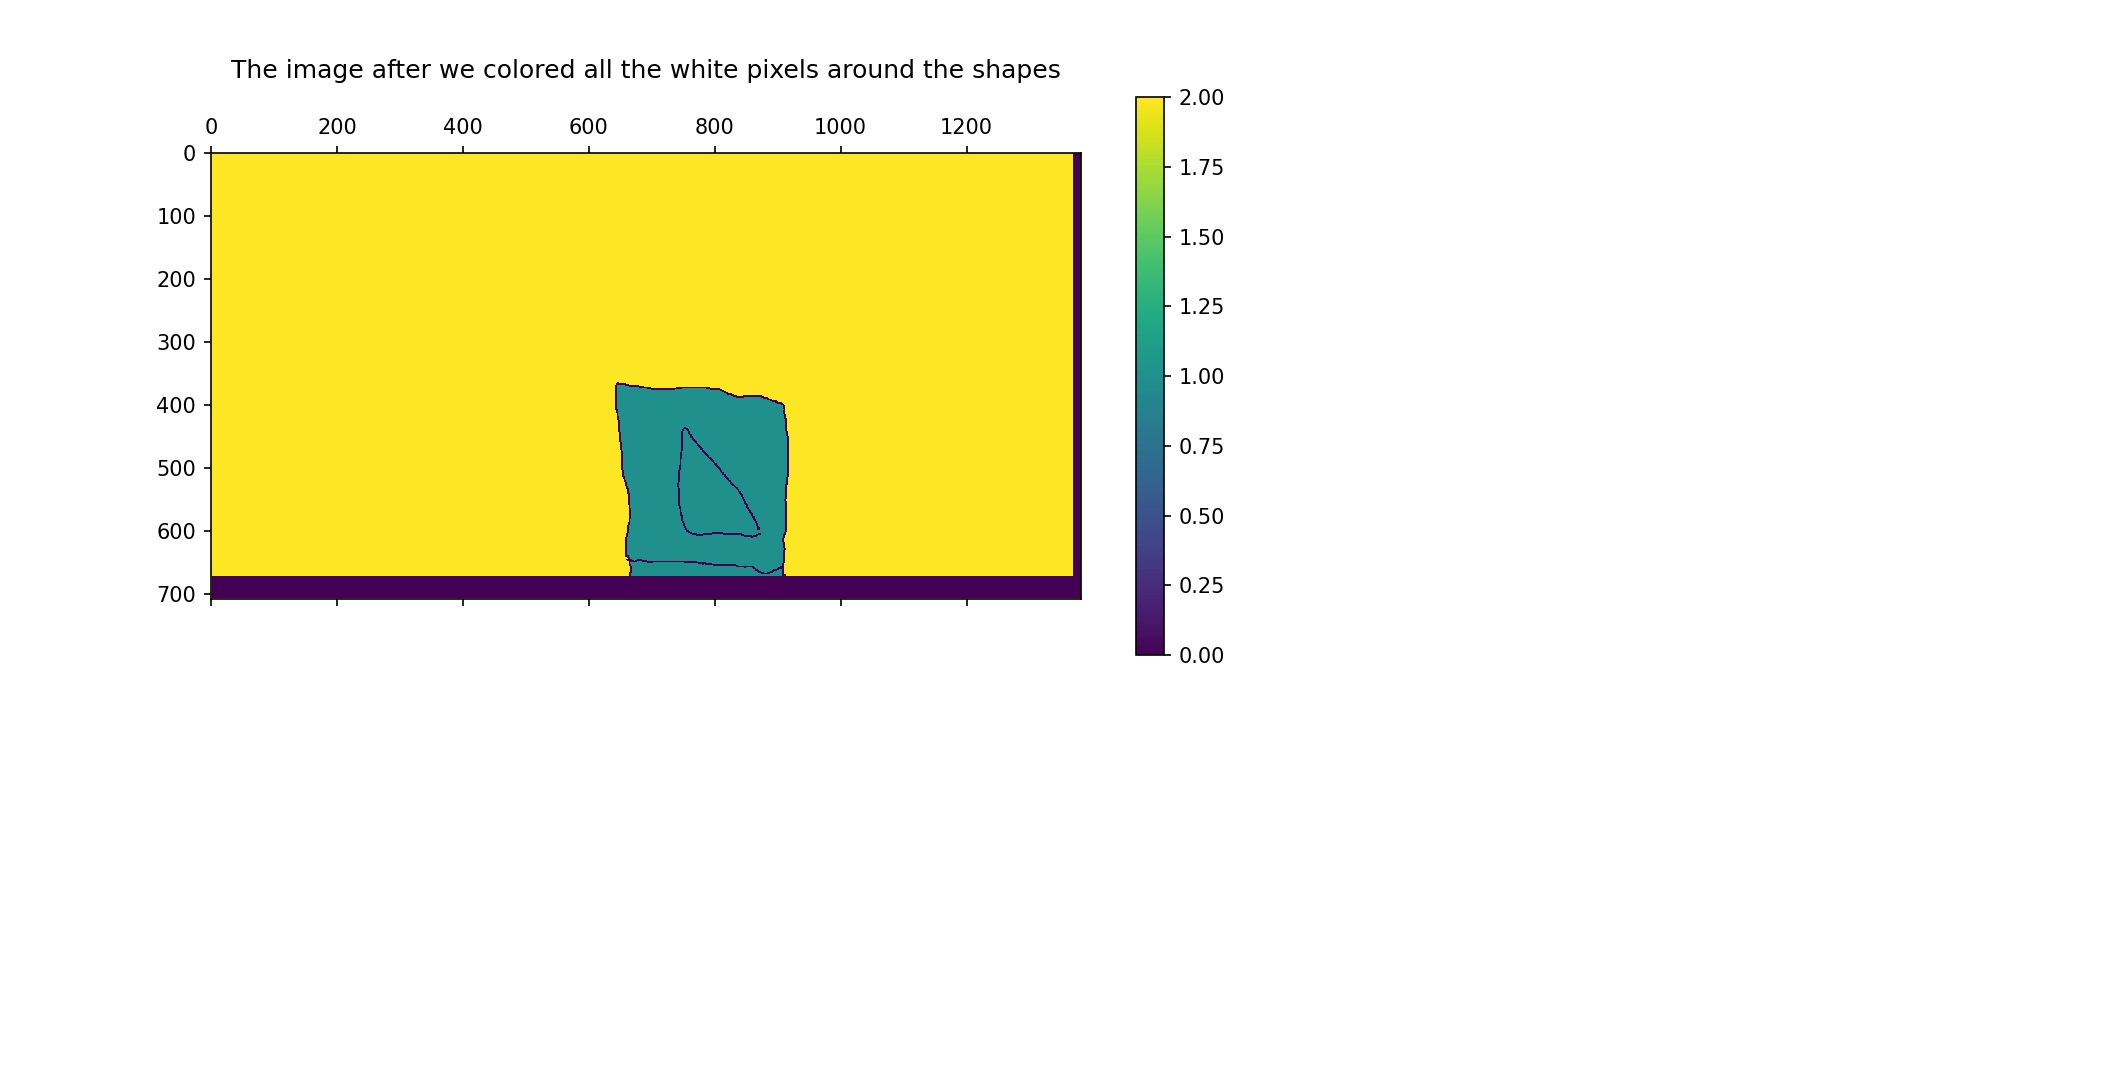




Directory number: 7554, Drawing number: 13

Number of lines : 13

Line number 1 mean pressure is: 0.2937265629017794 and the length of it is: 105.9087591888425
Line number 2 mean pressure is: 0.5553447806835174 and the length of it is: 134.10891287152486
Line number 3 mean pressure is: 0.6694113536619805 and the length of it is: 162.29952719825314
Line number 4 mean pressure is: 0.722778972387314 and the length of it is: 29.933722090978712
Line number 5 mean pressure is: 0.4111901339653291 and the length of it is: 1671.7516342351696
Line number 6 mean pressure is: 0.5136740283638823 and the length of it is: 95.7593601692197
Line number 7 mean pressure is: 0.5073038557903808 and the length of it is: 452.28579908852805
Line number 8 mean pressure is: 0.6199625294382979 and the length of it is: 106.46933122787186
Line number 9 mean pressure is: 0.6844885177440472 and the length of it is: 276.7536908552615
Line number 10 mean pressure is: 0.7641740004931178 and the length of it is: 345.

<IPython.core.display.Javascript object>


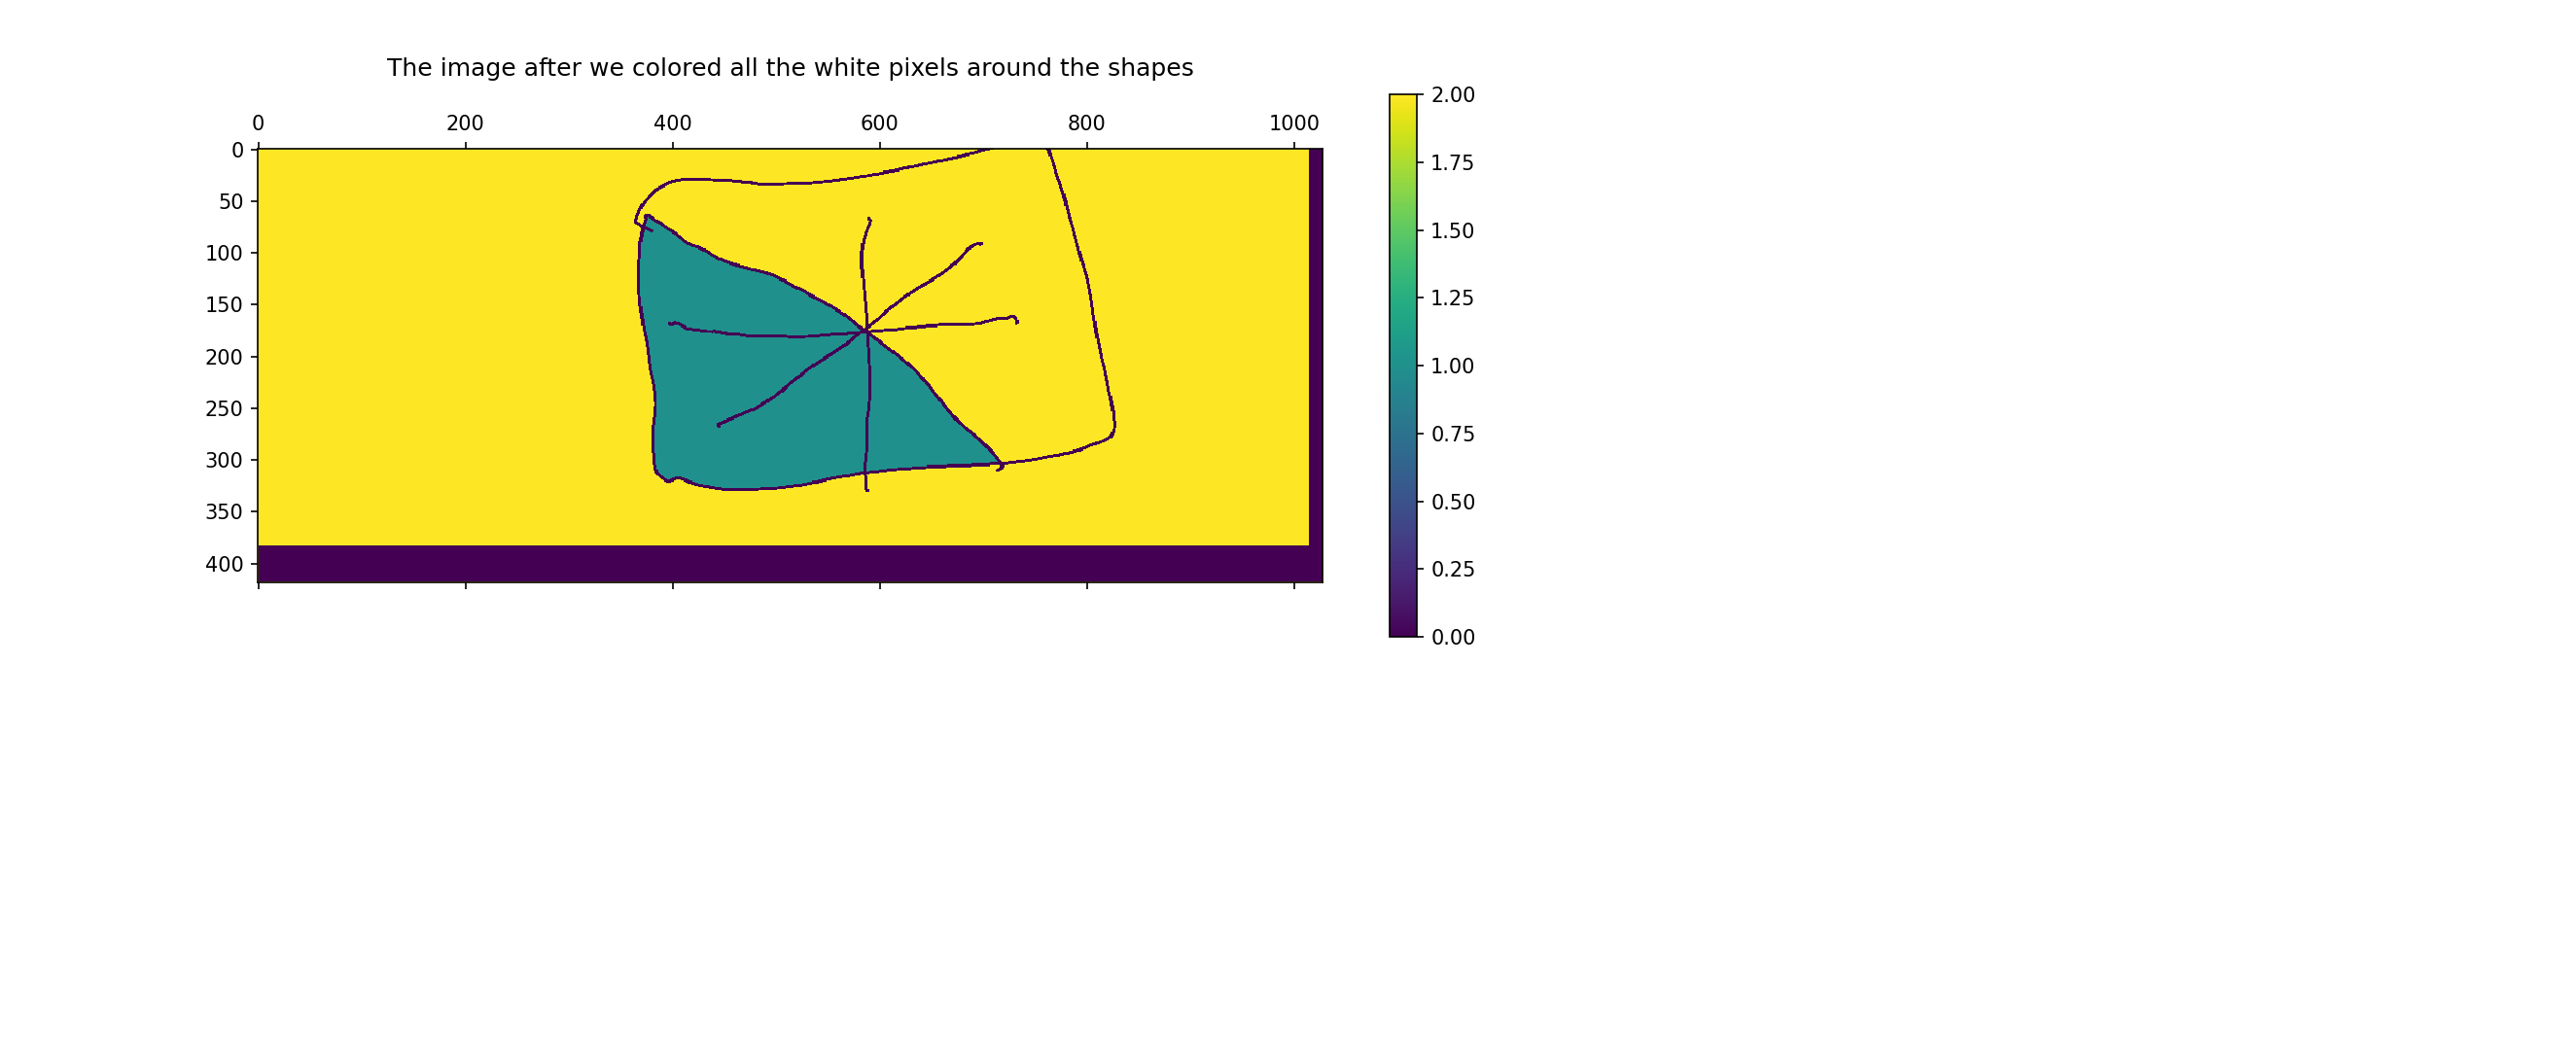

In [27]:

files = [4, 8, 13]
for file in files:
    df, img, png_url = load_image(7554, file)
    df = preprocessing(df)
    print("Directory number: 7554, Drawing number: {file}\n".format(file=file))
    print("Number of lines : " + str(count_lines(df)) + "\n")
    len_and_mean_pressure(lines_indexes(df))
    print("\n")
    print("Number of lifts : " + str(lifts(df)) +'\n')
    closed_or_open_shape(img)
    print("\n\n")